In [4]:
import pandas as pd
df = pd.read_csv("diabets_after_EDA.csv", index_col=0)
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Education,Income,Obese_flag,Age_group_num,LowIncome_flag,HighIncome_flag,soc_index,Lifestyle_score,cardio_index,General_index
0,0,1,1,1,40,1,0,0,0,0,...,4,3,1,3,1,0,7,1,2,10
1,0,0,0,0,25,1,0,0,1,0,...,6,1,0,2,1,0,7,2,5,14
2,0,1,1,1,28,0,0,0,0,1,...,4,8,0,3,0,1,12,2,2,16
3,0,1,0,1,27,0,0,0,1,1,...,3,6,0,4,0,0,9,4,4,17
4,0,1,1,1,24,0,0,0,1,1,...,5,4,0,4,0,0,9,4,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,6,7,1,2,0,1,13,3,3,19
253676,1,1,1,1,18,0,0,0,0,0,...,2,4,0,4,0,0,6,2,2,10
253677,0,0,0,1,28,0,0,0,1,1,...,5,2,0,1,1,0,7,3,5,15
253678,0,1,0,1,23,0,0,0,0,1,...,5,1,0,2,1,0,6,3,4,13


### Гипотеза 3

Гипотеза 3. Физическое здоровье и диабет

Тип: непараметрический тест (Mann–Whitney)

По boxplot видно, что PhysHlth очень перекошен и имеет кучу нулей → классический кейс, где t-test не так хорош.
 • H₀: распределения PhysHlth в группах с диабетом и без одинаковы.
 • H₁: у людей с диабетом PhysHlth выше (больше дней плохого физического здоровья).

Тест:
 • Mann–Whitney U: mannwhitneyu(phys_diab, phys_no_diab, alternative="greater").

Почему не t-test:
 • PhysHlth целочисленный [0–30] с огромной долей нулей → сильная ненормальность;
 • даже при большом N t-test будет менее интерпретируемым, а преподавателю понравится, что ты осознанно выбираешь непараметрику.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import shapiro

In [29]:
hlth_diab = df[df["Diabetes_binary"] == 1]["PhysHlth"].values
hlth_no_diab = df[df["Diabetes_binary"] == 0]["PhysHlth"].values
_, p_value = levene(hlth_diab, hlth_no_diab)
print(f"p-value: {p_value:.3f}")
_, p_value_a = shapiro(hlth_diab)
_, p_value_b = shapiro(hlth_no_diab)
print(f"p-value: {p_value_a:.3f}")
print(f"p-value: {p_value_b:.3f}")
_, p_value = mannwhitneyu(hlth_diab, hlth_no_diab, alternative="greater")
print(f"p-value: {p_value:.3f}")

p-value: 0.000
p-value: 0.000
p-value: 0.000
p-value: 0.000


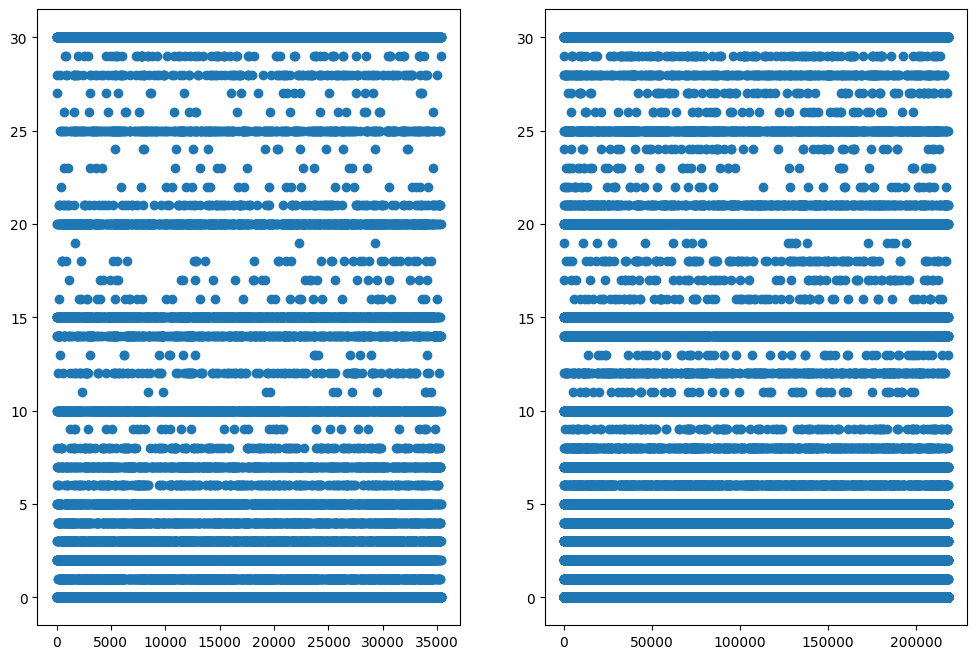

In [24]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(range(len(hlth_diab)), hlth_diab)
plt.subplot(1,2,2)
plt.scatter(range(len(hlth_no_diab)), hlth_no_diab)
plt.show()

Данные имеют перекос в обеих группах, а также негомогенны. Так что проверяем гипотезу о том, одинаковые ли эти группы через Mann-Whitney U тест. Он показал, что в среднем за последние 30 дней люди с диабетом чувствуют себя физически хуже чем люди без него.

### Гипотеза 4

Гипотеза 4. Возраст и риск диабета

Тип: корреляция Спирмена (порядковая vs бинарная)

Есть Age_group_num (1–4, от молодых до 65+). По EDA видно: у диабетиков средний возрастной код выше.
 • H₀: нет монотонной связи между возрастной группой и наличием диабета.
 • H₁: с ростом возрастной категории вероятность диабета увеличивается.

In [55]:
from scipy.stats import spearmanr
age = df["Age_group_num"].values
diab = df["Diabetes_binary"].values
_, p_value = spearmanr(age, diab, alternative="greater")
print(f"p-value: {p_value}")

p-value: 0.0


<Figure size 1200x800 with 0 Axes>

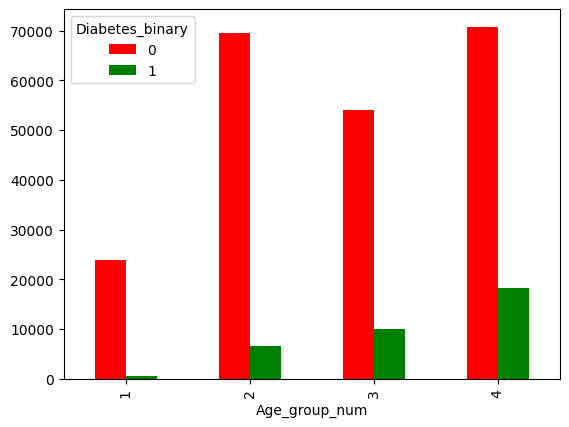

In [81]:
age_counts = df.groupby(["Age_group_num", "Diabetes_binary"]).size().unstack()
plt.figure(figsize=(12,8))
age_counts.plot(kind="bar", color=["red", "green"])
plt.show()

Также мы исследовали зависимость возрастной группы людей от наличия у них диабета. Коэффицент Спирамана выявил наличие прямой связи наличия диабета с возрастом, чем выше возраст - тем чаще встречается диабет.